In [1]:
from keras import layers
from keras import models
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [3]:
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

In [5]:
conv_base = VGG19(weights="imagenet", include_top=False, input_shape=(32, 32, 3), classes = 10)
conv_base.trainable = True
set_trainable = True
for layer in conv_base.layers:
    if layer.name == "block5_conv1" or "block5_conv2" or "block5_conv3" or "block5_conv4" or "block5_pool":
        set_trainable = True
    if layer.name == "block4_conv1" or "block4_conv2" or "block4_conv3" or "block4_conv4" or "block4_pool":
        set_trainable = True
    if layer.name == "block3_conv1" or "block3_conv2" or "block3_conv3" or "block3_conv4" or "block3_pool":
        set_trainable = True
    else:
        layer.trainable = False
        
model = models.Sequential([
   conv_base,
   layers.Flatten(),
   layers.Dense(512, activation="elu"),
   layers.Dense(10, activation="softmax"),
])
model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-5),
    metrics=["acc"]
)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 20,292,170
Trainable params: 20,292,170
Non-trainable params: 0
_________________________________________________________________


In [7]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_label, valid_label = train_test_split(train_images,
                                                              train_labels,
                                                              test_size=0.02,
                                                              random_state=13
                                                              )
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((49000, 32, 32, 3), (1000, 32, 32, 3), (49000, 10), (1000, 10))

In [8]:
history = model.fit(train_X, train_label, epochs=20, batch_size=128, validation_data=(valid_X, valid_label))

Epoch 1/20
383/383 [==============================] - 35s 59ms/step - loss: 0.1966 - acc: 0.5724 - val_loss: 0.1505 - val_acc: 0.6990
Epoch 2/20
383/383 [==============================] - 21s 54ms/step - loss: 0.1307 - acc: 0.7300 - val_loss: 0.1188 - val_acc: 0.7640
Epoch 3/20
383/383 [==============================] - 21s 54ms/step - loss: 0.1076 - acc: 0.7813 - val_loss: 0.1092 - val_acc: 0.7820
Epoch 4/20
383/383 [==============================] - 21s 54ms/step - loss: 0.0926 - acc: 0.8128 - val_loss: 0.1051 - val_acc: 0.7830
Epoch 5/20
383/383 [==============================] - 21s 54ms/step - loss: 0.0813 - acc: 0.8383 - val_loss: 0.1009 - val_acc: 0.7900
Epoch 6/20
383/383 [==============================] - 21s 54ms/step - loss: 0.0718 - acc: 0.8582 - val_loss: 0.1064 - val_acc: 0.7960
Epoch 7/20
383/383 [==============================] - 21s 54ms/step - loss: 0.0627 - acc: 0.8774 - val_loss: 0.0908 - val_acc: 0.8390
Epoch 8/20
383/383 [==============================] - 21s 54ms

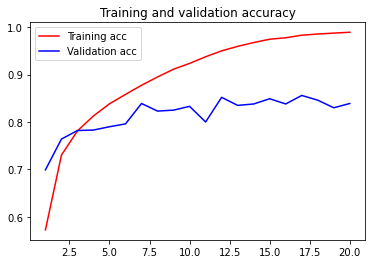

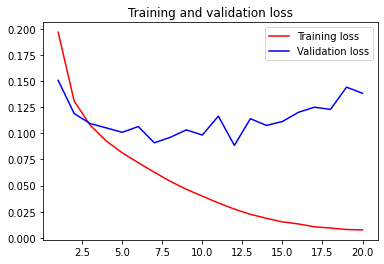

In [9]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 9ms/step - loss: 0.1476 - acc: 0.8380


313/313 [==============================] - 2s 6ms/step


[[Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')],
 [Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')]]

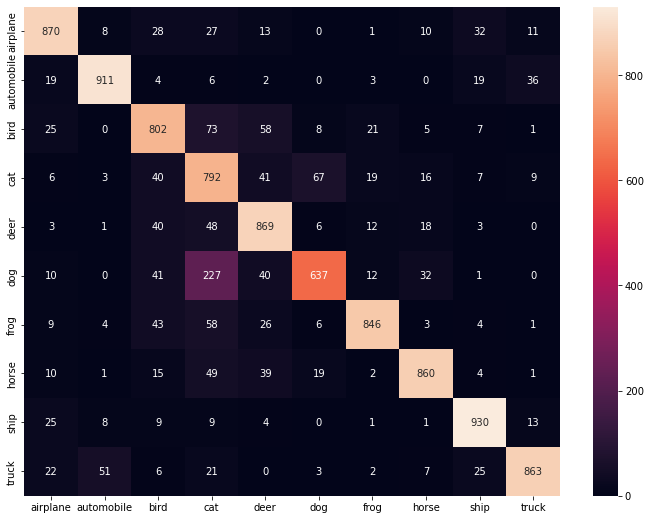

In [11]:
import seaborn as sns
import numpy as np
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Predict the values from the validation dataset
y_pred = model.predict(test_images)
# Convert predictions classes to one hot vectors t_del
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(test_labels,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=classes, yticklabels=classes)

In [12]:
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.applications.vgg19 import preprocess_input

img_path = 'C:/Users/kuzik/Desktop/photo1638515109.jpeg'
img = load_img(img_path)
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x).astype("float32") / 255

features = model.predict(x)

1/1 [==============================] - 4s 4s/step


In [14]:
features[0]

array([1.6070480e-04, 5.8959859e-09, 1.6559830e-10, 9.9484211e-01,
       4.9972255e-03, 1.0192026e-17, 2.1450440e-08, 3.1879610e-11,
       1.5496136e-10, 2.8165581e-09], dtype=float32)

In [15]:
top = []
top_num = 3
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for request in range(1):  # num of foto or objects on foto
    classes_request = classes
    features_request = features[0]
    rang = 1
    for i in range(top_num):
        pred = np.argmax(features_request)
#         print(pred)
        top.append([rang, classes_request[pred], round(features_request[np.argmax(features_request)], 4)])
#         print(top)
        features_request = np.delete(features_request, np.argmax(features_request))
#         print(features_request)
        classes_request.remove(classes_request[pred])
#         print(classes_request)
        rang +=1
# for el in top:
#     print(el)


In [16]:
i = 0
for el in top:
    print(f"{top[i][0]}. It is {top[i][1]} with {top[i][2]} chance")
    i += 1

1. It is cat with 0.9947999715805054 chance
2. It is deer with 0.004999999888241291 chance
3. It is airplane with 0.00019999999494757503 chance


In [17]:
model.save('base_model.h5')

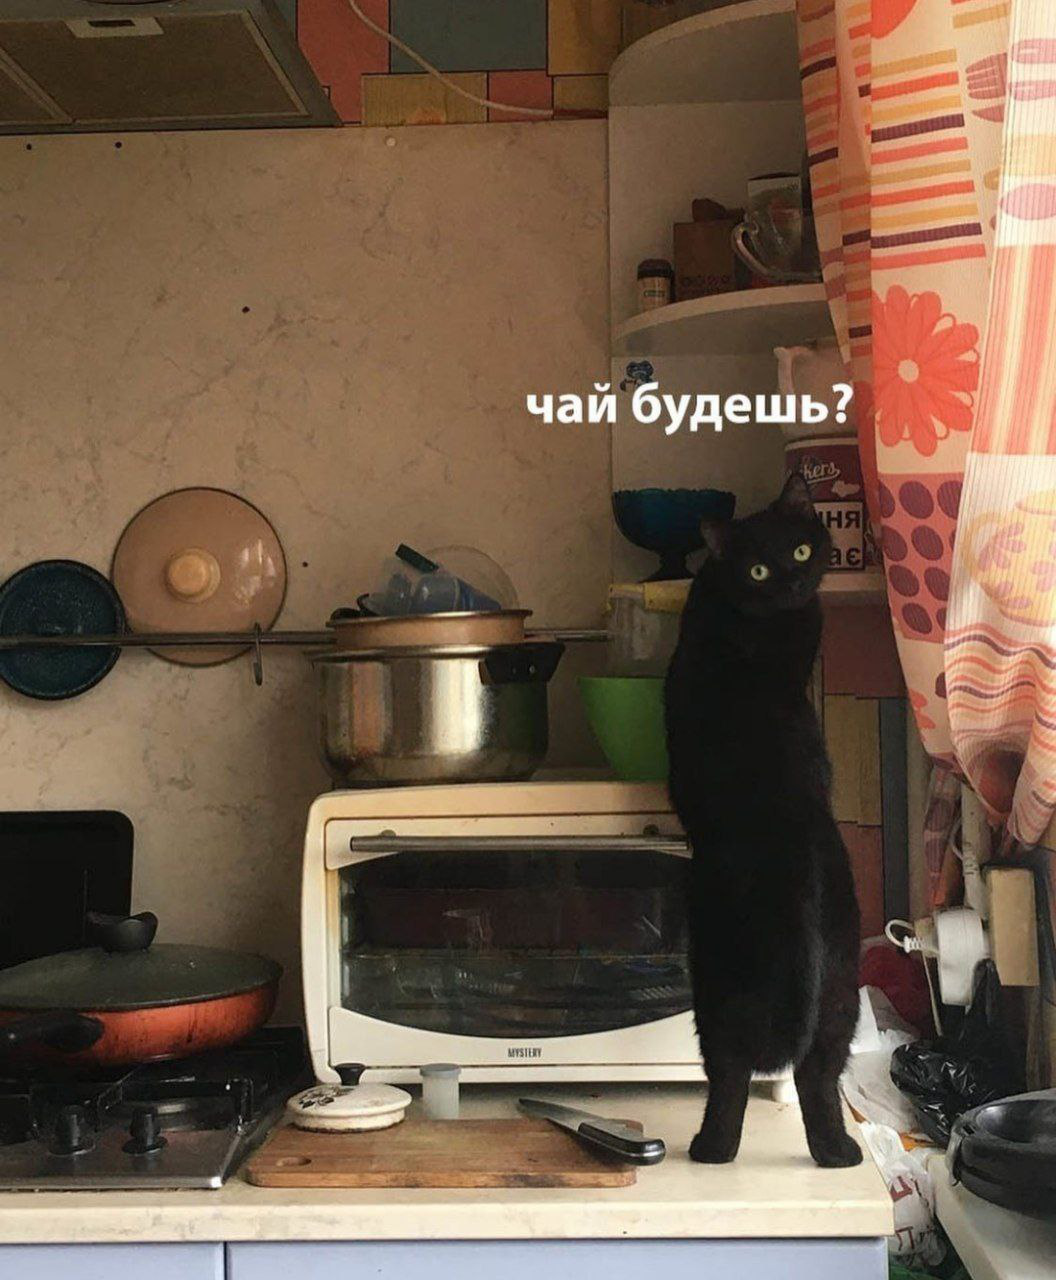

In [20]:
img

In [22]:
x.shape

(1, 1280, 1056, 3)